In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [4]:
df.head(5)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

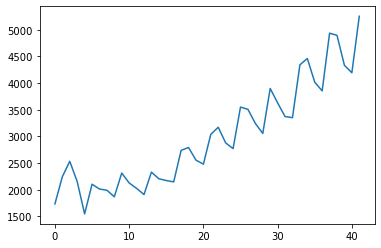

In [7]:
df['Sales'].plot()

In [8]:
seasonal_dcp = seasonal_decompose(df['Sales'],period=4)

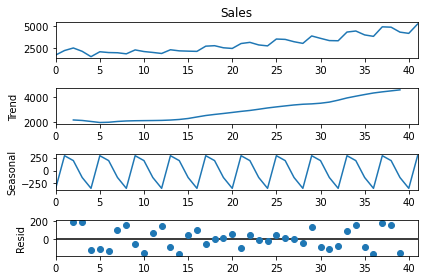

In [9]:
seasonal_dcp.plot();

#### Trend seems to be non-linear, we can use Holt Winters method to forecast.
#### Also seasonality looks to increase exponentially, so SARIMA model can be explored as well.

In [10]:
train = df.head(32)
test = df.tail(10)

### Holt Winter Exponential Smoothing

In [11]:
holt_Win_mul = ExponentialSmoothing(train['Sales'],trend='mul',seasonal='mul',seasonal_periods=4).fit()
hw_mul_forecast = holt_Win_mul.predict(test.index[0],test.index[-1])
np.sqrt(mse(test['Sales'],hw_mul_forecast))

C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


455.8282881296425

<AxesSubplot:>

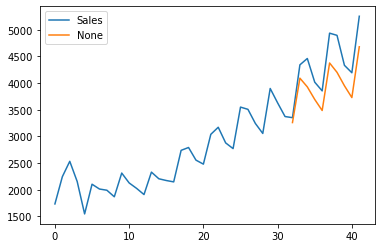

In [12]:
df.plot(legend=True)
hw_mul_forecast.plot(legend=True)

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots

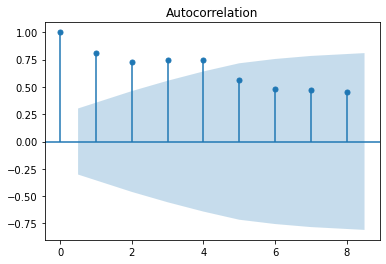

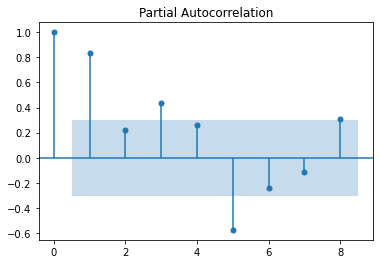

In [14]:
tsa_plots.plot_acf(df['Sales'],lags=8)
tsa_plots.plot_pacf(df['Sales'],lags=8)
plt.show()

In [15]:
from pmdarima import auto_arima

In [16]:
auto_arima(df['Sales'],error_action='ignore',seasonal=True,m=8).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   42
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 8)   Log Likelihood                -216.485
Date:                             Sun, 27 Mar 2022   AIC                            444.971
Time:                                     11:46:58   BIC                            453.950
Sample:                                          0   HQIC                           447.992
                                              - 42                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1405      0.087      1.624      0.104      -0.029       0.310
ar.L2         -0.9962      0.029    -34.680      0.000      -1.053      -0.940
ma.L1         -0.2327      0.141     -1.647      0.099      -0.510       0.044
ma.L2          0.9378      0.655      1.432      0.152      -0.346       2.221
ma.S.L8       -0.7492      0.564     -1.329      0.184      -1.855       0.356
sigma2      2.175e+04   1.53e+04      1.417      0.156   -8324.256    5.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.75   Prob(JB):                         0.41
Heteroskedasticity (H):               0.38   Skew:                            -0.37
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
# model = SARIMAX(train['Sales'],order=(4, 1, 0),seasonal_order=(0,1,0,4))
# results = model.fit()
# results.summary()

In [19]:
model = SARIMAX(train['Sales'],order=(2, 1, 2),seasonal_order=(0, 1, [1], 8))
results = model.fit()
results.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   32
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 8)   Log Likelihood                -152.724
Date:                             Sun, 27 Mar 2022   AIC                            317.448
Time:                                     11:46:58   BIC                            324.261
Sample:                                          0   HQIC                           319.162
                                              - 32                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5067      0.182      2.788      0.005       0.151       0.863
ar.L2         -0.8771      0.137     -6.407      0.000      -1.145      -0.609
ma.L1         -0.8896      0.311     -2.861      0.004      -1.499      -0.280
ma.L2          0.9659      0.658      1.468      0.142      -0.324       2.255
ma.S.L8       -0.4628      0.416     -1.113      0.266      -1.277       0.352
sigma2      2.605e+04   1.63e+04      1.598      0.110   -5905.924     5.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.93   Prob(JB):                         0.53
Heteroskedasticity (H):               0.55   Skew:                            -0.56
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
test_forecast = results.predict(test.index[0],test.index[-1],type='levels')

In [21]:
np.sqrt(mse(test['Sales'],test_forecast))

477.30446653364913

#### Training on whole data-set and generating forecast.

In [22]:
model_f = SARIMAX(df['Sales'],order=(2, 1, 2),seasonal_order=(0, 1, [1], 8))
results_f = model_f.fit()

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
forecast = results.predict(len(df),len(df)+12,type='levels')

In [24]:
forecast

42    4532.037949
43    4255.258504
44    4042.124284
45    4749.621250
46    4649.429637
47    4435.232404
48    4357.800826
49    5034.395317
50    5005.824053
51    4741.514201
52    4565.536542
53    5280.924042
54    5152.142246
Name: predicted_mean, dtype: float64

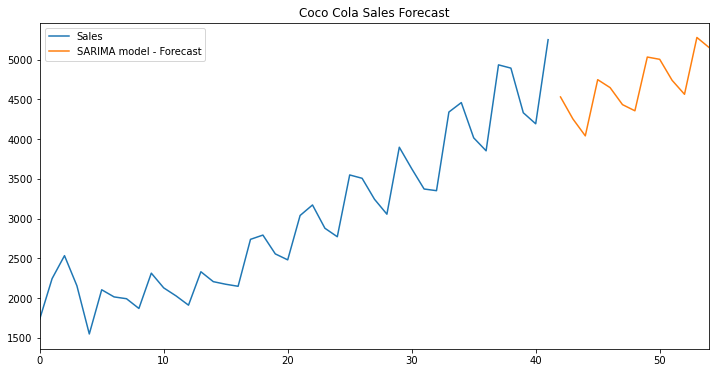

In [25]:
# Plot predictions against known values
title = 'Coco Cola Sales Forecast'
ylabel = ''
xlabel=''

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True,label='SARIMA model - Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);